# pandas_datareaderでデータ取得

In [36]:
import pandas_datareader.data as pdr
import datetime
start = datetime.datetime(1971,1,4)
end = datetime.datetime(2019,8,30)
JPY_USD = pdr.DataReader('DEXJPUS', 'fred', start, end)
JPY_USD.head(1)

,DEXJPUS
DATE,
1971-01-04,357.73


Text(0, 0.5, 'JPY/USD')

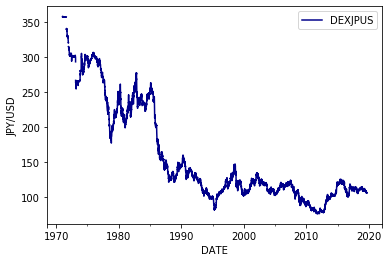

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
JPY_USD.plot(color='darkblue')
plt.ylabel('JPY/USD')

Text(0, 0.5, 'JPY/USD')

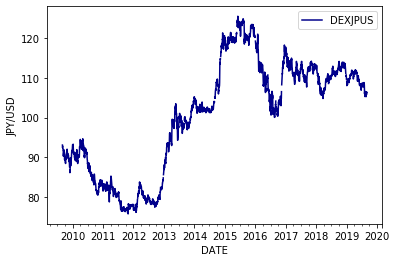

In [3]:
JPY_USD1 = JPY_USD.loc["2009/9/1":]
JPY_USD1.plot(color="darkblue")
plt.ylabel('JPY/USD')

Text(0, 0.5, 'JPY/USD')

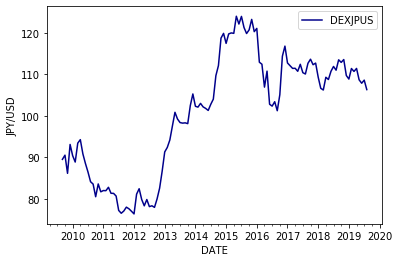

In [4]:
JPY_USD2=JPY_USD1.resample('M').last()
JPY_USD2.plot(color="darkblue")
plt.ylabel('JPY/USD')

In [9]:
import pandas as pd
min_USD=JPY_USD.resample('Y').min()
max_USD=JPY_USD.resample('Y').max()
mean_USD=JPY_USD.resample('Y').mean()
JPY_USD3=pd.concat([min_USD,max_USD,mean_USD], axis=1).dropna()
JPY_USD3.columns=['min','max','mean']
JPY_USD3.tail()

,min,max,mean
DATE,,,
2015-12-31,116.78,125.58,121.049084
2016-12-31,100.07,121.06,108.656932
2017-12-31,107.72,117.68,112.098554
2018-12-31,104.83,114.19,110.397390
2019-12-31,105.30,112.00,109.320120


# 2.価格・対数価格・収益率・対数収益率

In [37]:
import numpy as np
JPY_USD = JPY_USD.resample('M').last()

JPY_USD['ln'] = np.log(JPY_USD) #対数価格
JPY_USD['r'] = JPY_USD['DEXJPUS'].pct_change().dropna() #収益率
JPY_USD['lndp'] = JPY_USD['ln'].diff().dropna() #対数収益率
JPY_USD['dp'] = JPY_USD['DEXJPUS'].diff().dropna() #価格差
JPY_USD.tail()

,DEXJPUS,ln,r,lndp,dp
DATE,,,,,
2019-04-30,111.40,4.713127,0.006505,0.006484,0.72
2019-05-31,108.66,4.688224,-0.024596,-0.024904,-2.74
2019-06-30,107.84,4.680649,-0.007546,-0.007575,-0.82
2019-07-31,108.58,4.687487,0.006862,0.006839,0.74
2019-08-31,106.30,4.666265,-0.020998,-0.021222,-2.28


Text(0, 0.5, 'lndp_ JPY/USD')

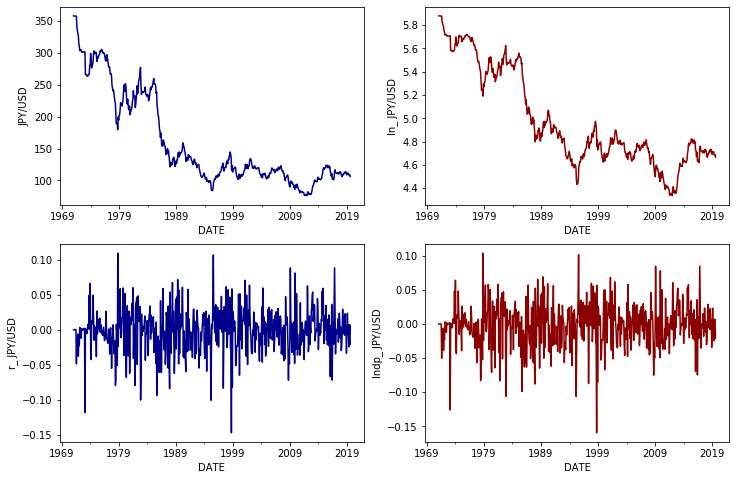

In [38]:
fig=plt.figure(figsize=(12,8))

ax=plt.subplot(2,2,1)
JPY_USD['DEXJPUS'].plot(color='darkblue',ax=ax)
plt.ylabel('JPY/USD')

ax2=plt.subplot(2,2,2)
JPY_USD['ln'].plot(color='darkred',ax=ax2)
plt.ylabel('ln_ JPY/USD')

ax3=plt.subplot(2,2,3)
JPY_USD['r'].plot(color='darkblue',ax=ax3)
plt.ylabel('r_ JPY/USD')

ax4=plt.subplot(2,2,4)
JPY_USD['lndp'].plot(color='darkred',ax=ax4)
plt.ylabel('lndp_ JPY/USD')

Text(0, 0.5, 'probability density function')

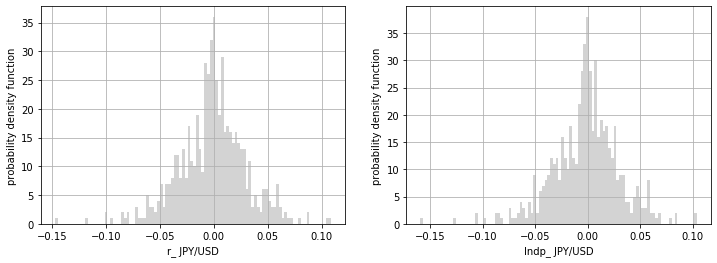

In [39]:
fig=plt.figure(figsize=(12,4))

ax=plt.subplot(1,2,1)
JPY_USD['r'].hist(bins=100, color='lightgray',ax=ax)
plt.xlabel('r_ JPY/USD')
plt.ylabel('probability density function')

ax2=plt.subplot(1,2,2)
JPY_USD['lndp'].hist(bins=100, color='lightgray',ax=ax2)
plt.xlabel('lndp_ JPY/USD')
plt.ylabel('probability density function')